# Preparing data and modules for analysis

### Import required modules

In [176]:
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Uploading csv
Dropped a few columns because they are not relavent and saves computing power

In [177]:
#Read csv into dataframe 
vader = pd.read_csv('news/Crypto_Sentiment_Analysis_VADER.csv', encoding='latin1')
textblob = pd.read_csv('news/Crypto_Sentiment_Analysis_TextBlob.csv', encoding='latin1')
bitcoin_price = pd.read_csv('news/bitcoin_price_with_labels.csv')

daily_vader = pd.read_excel('news/Daily_Sentiment_Analysis_VADER.xlsx')
daily_textblob = pd.read_excel('news/Daily_Sentiment_Analysis_TextBlob.xlsx')

#Drop unnecessary columns these could become confusing because multiple headline columns and be more effiecent.
columns_to_drop = ['Countries', 'Company', 'Headline', 'Cleaned Headline', 'Count']

vader = vader.drop(columns=columns_to_drop)
textblob = textblob.drop(columns=columns_to_drop)

### Combining bitcoin price with daily sentiment scores.
We are looking to see the changes in Bitcoin price along side the changes in sentiment. For this we need to combine the data frames so that sentiment and price change for each date are in teh same dataframe. 

In [179]:
# Convert the date columns to datetime
bitcoin_price['Date'] = pd.to_datetime(bitcoin_price['Date'])
daily_vader['Published date'] = pd.to_datetime(daily_vader['Published date'])

# Merge the two dataframes on the date columns
vader_bit = pd.merge(bitcoin_price, daily_vader, left_on='Date', right_on='Published date')

# Drop the redundant 'Published date' column
vader_bit.drop(columns=['Published date'], inplace=True)


# Convert the date columns to datetime
bitcoin_price['Date'] = pd.to_datetime(bitcoin_price['Date'])
daily_textblob['Published date'] = pd.to_datetime(daily_textblob['Published date'])

# Merge the two dataframes on the date columns
textblob_bit = pd.merge(bitcoin_price, daily_textblob, left_on='Date', right_on='Published date')

# Drop the redundant 'Published date' column
textblob_bit.drop(columns=['Published date'], inplace=True)

# i Sentiment Trends Over Time
### The below code a line plot to visualise the Sentiment Trends Over Time.
Analysis has been included after the graph so that it is possible to look at the graph along side the analysis.

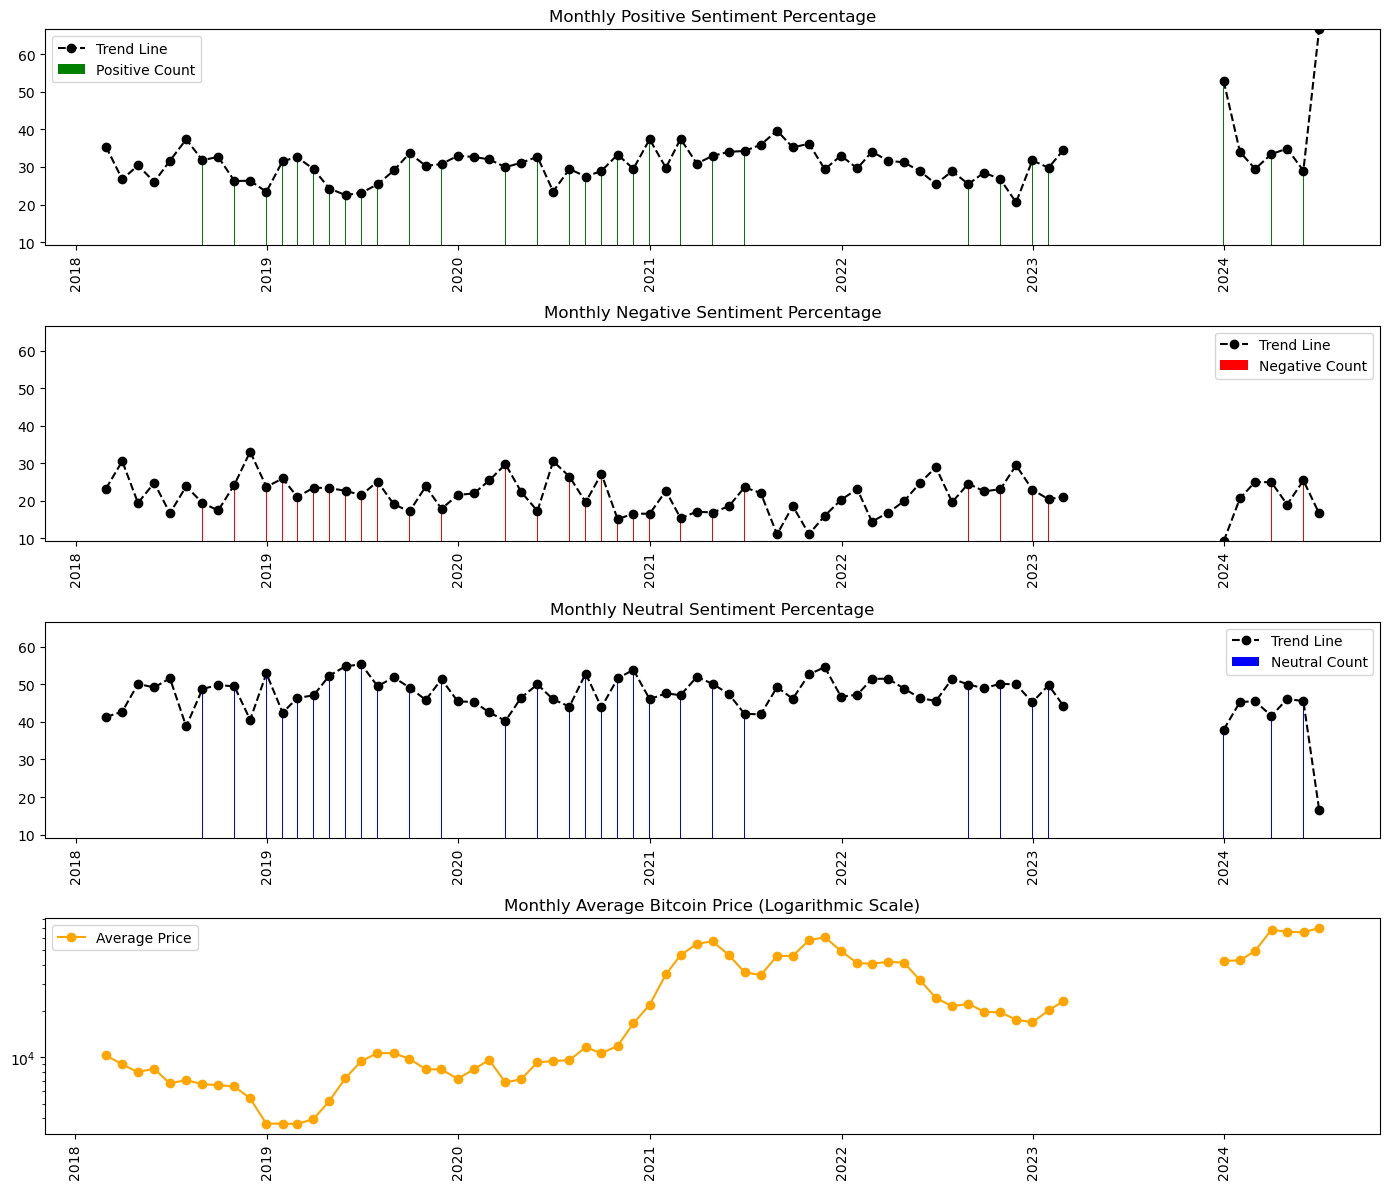

In [195]:
# Plotting bar charts for monthly sentiment counts with trend lines and Bitcoin price on its own scale
plt.figure(figsize=(14, 12))

# Convert 'Date' to datetime format
vader_bit['Date'] = pd.to_datetime(vader_bit['Date'])

# Aggregate by month to reduce the number of data points
monthly_sentiment_counts = vader_bit.resample('M', on='Date').agg({
    'Positive_Percentage': 'mean',
    'Negative_Percentage': 'mean',
    'Neutral_Percentage': 'mean',
    'Close': 'mean'
}).reset_index()

# Determine common y-axis range for sentiment percentages
y_min_sentiment = min(monthly_sentiment_counts['Positive_Percentage'].min(), monthly_sentiment_counts['Negative_Percentage'].min(), monthly_sentiment_counts['Neutral_Percentage'].min())
y_max_sentiment = max(monthly_sentiment_counts['Positive_Percentage'].max(), monthly_sentiment_counts['Negative_Percentage'].max(), monthly_sentiment_counts['Neutral_Percentage'].max())

# Positive Sentiment
plt.subplot(4, 1, 1)
plt.bar(monthly_sentiment_counts['Date'], monthly_sentiment_counts['Positive_Percentage'], color='green', label='Positive Count')
plt.plot(monthly_sentiment_counts['Date'], monthly_sentiment_counts['Positive_Percentage'], color='black', linestyle='--', marker='o', label='Trend Line')
plt.ylim(y_min_sentiment, y_max_sentiment)
plt.title('Monthly Positive Sentiment Percentage')
plt.xticks(rotation=90)
plt.legend()

# Negative Sentiment
plt.subplot(4, 1, 2)
plt.bar(monthly_sentiment_counts['Date'], monthly_sentiment_counts['Negative_Percentage'], color='red', label='Negative Count')
plt.plot(monthly_sentiment_counts['Date'], monthly_sentiment_counts['Negative_Percentage'], color='black', linestyle='--', marker='o', label='Trend Line')
plt.ylim(y_min_sentiment, y_max_sentiment)
plt.title('Monthly Negative Sentiment Percentage')
plt.xticks(rotation=90)
plt.legend()

# Neutral Sentiment
plt.subplot(4, 1, 3)
plt.bar(monthly_sentiment_counts['Date'], monthly_sentiment_counts['Neutral_Percentage'], color='blue', label='Neutral Count')
plt.plot(monthly_sentiment_counts['Date'], monthly_sentiment_counts['Neutral_Percentage'], color='black', linestyle='--', marker='o', label='Trend Line')
plt.ylim(y_min_sentiment, y_max_sentiment)
plt.title('Monthly Neutral Sentiment Percentage')
plt.xticks(rotation=90)
plt.legend()

# Monthly Bitcoin Price
plt.subplot(4, 1, 4)
plt.plot(monthly_sentiment_counts['Date'], monthly_sentiment_counts['Close'], color='orange', linestyle='-', marker='o', label='Average Price')
plt.yscale('log')
plt.title('Monthly Average Bitcoin Price (Logarithmic Scale)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


### Analysis of price and sentiment graphs
The price of bitcoin has been plotted on a logarithmic scale, this is because it was very difficult to see the pice fluctuations between 2018 - 2020 as after this the price went up exponetially.

In the middle on 2018 we can see the price of bitcoin is decreasing and then in the final month of 2018 crashing. We can see from halfway through 2018 the positive news slowly decreases and then in the final months of 2018 the negative news spikes.

A quarter of the way through 2019 we can see the price start to recover again, this is followed by a 5 month consecutive increase in positive news at this point the negative news is stable.

When bitcoin goes on its bull run of 2021 there is not much of a trend of positive or negative news. This si srprising as this is the largest rally in price so you would have expected there to be more strong oppinons. A third of the way through 2021 we see the negative news start to creep up which corelates to a dip in the price. The price then recovers - this pattern in teh graph really strongly corelates with the neutral graph at this moment in time which is interesting.

A couple of months into 2022 we then see a genral falling in price which aligns with a slight slow falling of positive news sentiment and a rocky increase in negative news sentiment.

# ii Correlation Between Sentiment and Bitcoin Prices

### Bitcoin price change and sentiment scatter plots. 
I have written my analysis underneath the graphs. This is because the code for these plots is very large and and it is important to be able to see the analysis along side the plots. It is important to note that these are percentages of the sentiment for each day and not a count of sentiment. It was decided to do this as most days there is both positive and negative news and we are looking at the net sentiment for each day with the price change.

This can be sometimes misleading as on days where there is not much news e.g. there is 1 slightly postive headline then the score woud be 100% positive rather than a count of 1 positive headline. 

Vader:


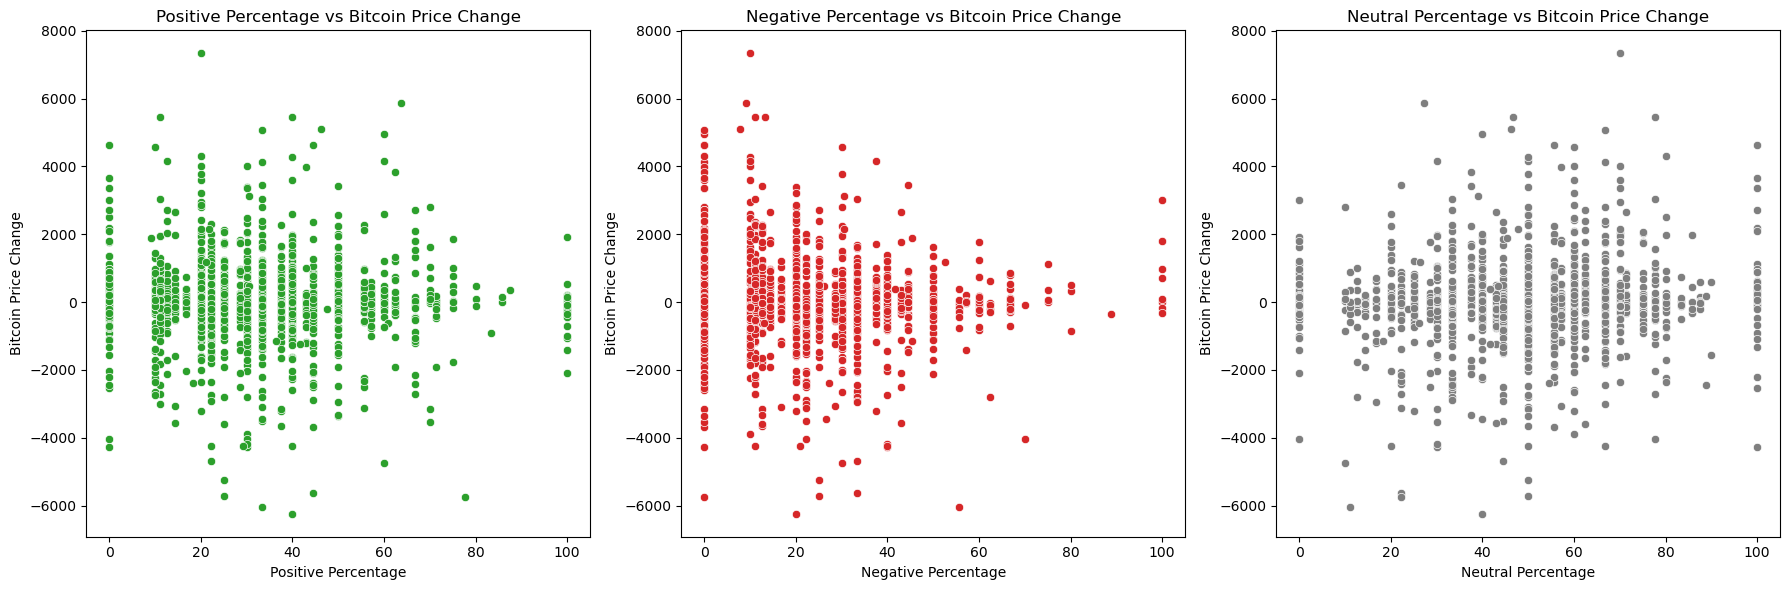

Text Blob:


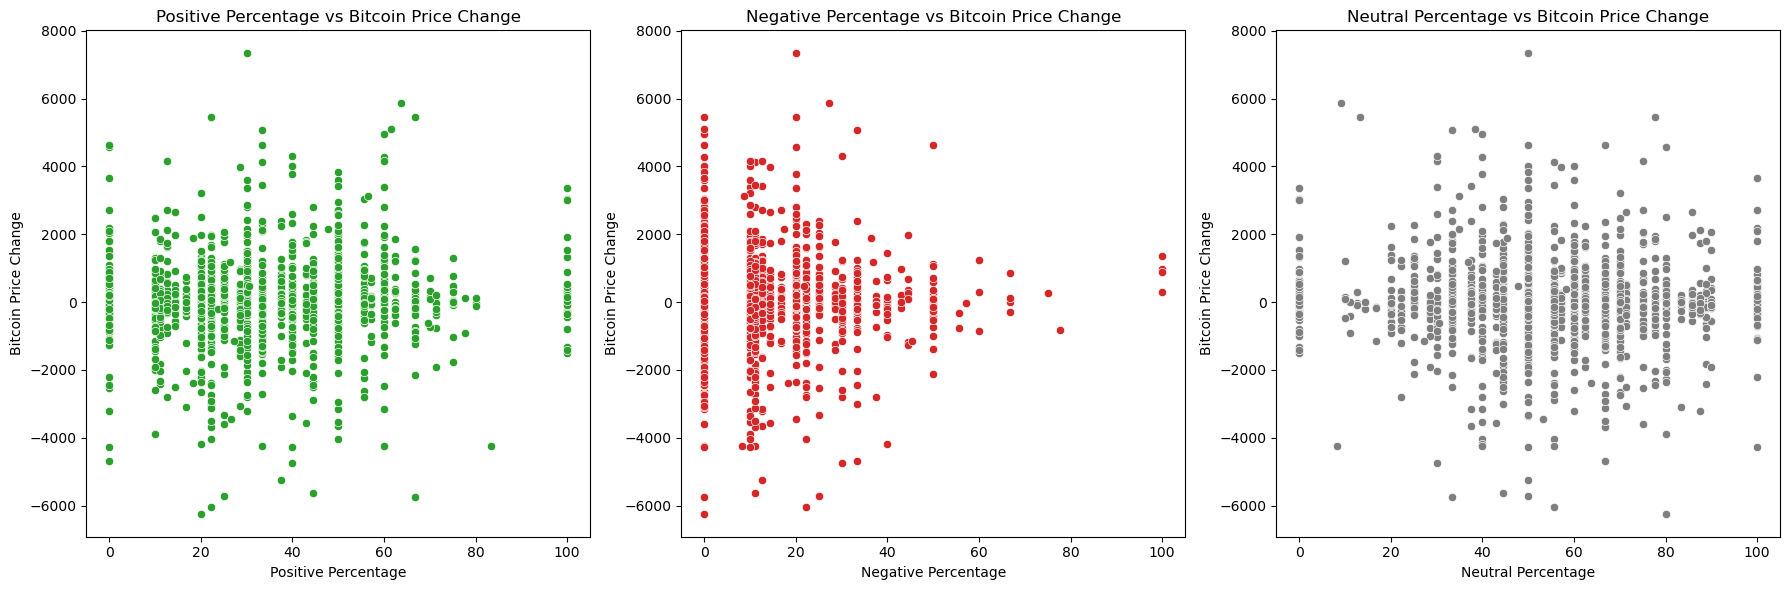

In [180]:
print('Vader:')
# Create scatter plots to explore the relationship between sentiment percentages and Bitcoin price change
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Positive Percentage vs Bitcoin Price Change
sns.scatterplot(x=vader_bit['Positive_Percentage'], y=vader_bit['Price Change'], ax=axes[0], color='tab:green')
axes[0].set_title('Positive Percentage vs Bitcoin Price Change')
axes[0].set_xlabel('Positive Percentage')
axes[0].set_ylabel('Bitcoin Price Change')

# Scatter plot for Negative Percentage vs Bitcoin Price Change
sns.scatterplot(x=vader_bit['Negative_Percentage'], y=vader_bit['Price Change'], ax=axes[1], color='tab:red')
axes[1].set_title('Negative Percentage vs Bitcoin Price Change')
axes[1].set_xlabel('Negative Percentage')
axes[1].set_ylabel('Bitcoin Price Change')

# Scatter plot for Neutral Percentage vs Bitcoin Price Change
sns.scatterplot(x=vader_bit['Neutral_Percentage'], y=vader_bit['Price Change'], ax=axes[2], color='tab:gray')
axes[2].set_title('Neutral Percentage vs Bitcoin Price Change')
axes[2].set_xlabel('Neutral Percentage')
axes[2].set_ylabel('Bitcoin Price Change')

plt.tight_layout()
plt.show()

print('Text Blob:')
# Create scatter plots to explore the relationship between sentiment percentages and Bitcoin price change
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Positive Percentage vs Bitcoin Price Change
sns.scatterplot(x=textblob_bit['Positive_Percentage'], y=textblob_bit['Price Change'], ax=axes[0], color='tab:green')
axes[0].set_title('Positive Percentage vs Bitcoin Price Change')
axes[0].set_xlabel('Positive Percentage')
axes[0].set_ylabel('Bitcoin Price Change')

# Scatter plot for Negative Percentage vs Bitcoin Price Change
sns.scatterplot(x=textblob_bit['Negative_Percentage'], y=textblob_bit['Price Change'], ax=axes[1], color='tab:red')
axes[1].set_title('Negative Percentage vs Bitcoin Price Change')
axes[1].set_xlabel('Negative Percentage')
axes[1].set_ylabel('Bitcoin Price Change')

# Scatter plot for Neutral Percentage vs Bitcoin Price Change
sns.scatterplot(x=textblob_bit['Neutral_Percentage'], y=textblob_bit['Price Change'], ax=axes[2], color='tab:gray')
axes[2].set_title('Neutral Percentage vs Bitcoin Price Change')
axes[2].set_xlabel('Neutral Percentage')
axes[2].set_ylabel('Bitcoin Price Change')

plt.tight_layout()
plt.show()

## Analysis of graphs
In the graphs above we are looking at the percentage of of positive, negative and neural sentiment with the price change for that day. 

#### Positive and negative percentage graph:
In the upper right quadrant we can see there are slightly more positive points than negative. This shows a slight corlation between positive sentiment and postive price increases. For the lower right quardrant I was hoping to see more of the negative percentages, however there are more postive points. This migth be because negative news may have more of an emotional impact and so despite there being more postive sentiment the the news, the negative sentiment has more of an impact. 

The upper left quadrant is more densly populated in with negative points than positive which is good as it shows reduced negative news have high bitcoin price increases.

In the negative graph Text Blob looks like a more centralised version of the Vader graph this could be due to less negative headlines in TextBlob. 


#### Neutral percentage graph:
For the neutral graph I would be expecting there be lots of variation in price when neutral percentage is 0 and this variation reducing as neutral percentage increases. This is because the more neutral news the more neutral price fluctations. However in the graph for both Vader and TextBlob there is not much of a trend. 

## Correlation Matrix
To get a more definitive answer of if there is a correlation I have created a correlation matrix. This has been created by separting out the data frame into postive price change, no price change and negative price changes. The neutral dataframe is a bit more tricky as the price is always changing so there as few if any days where the change is exactly 0. For this plot we are using the percentages for each day, this means that automatically there will be a corelation between negative and positive sentiment. 

#### Positive price change:
We can see a very weak positive corelation with price increase and positive news. This trend is >10x as strong in Text Blob than with Vader. We can also see a weak correlation between price increase and negative news this trend is strong in Vader than in Text Blob however this is not as important as we are looking at the positive change in prices. This is very encouraging as shows with postive sentiment price increases. 

#### Negative price change:
We can see a weak positive corelation with price decreasing and increase in negative sentiment in text blob. Vader has corelation of -0.01 which is very weak so it is difficult to draw any conclusions from. There is also a negative corlation of 0.04 between postive news and price decrease in both Vader and TextBlob. 

#### Over all:
Taking both of these into account, Text Blob has the expected corelations between price change and news sentiment. The positve corelation of price increase and positive news is also a lot strong in Text Blob. 

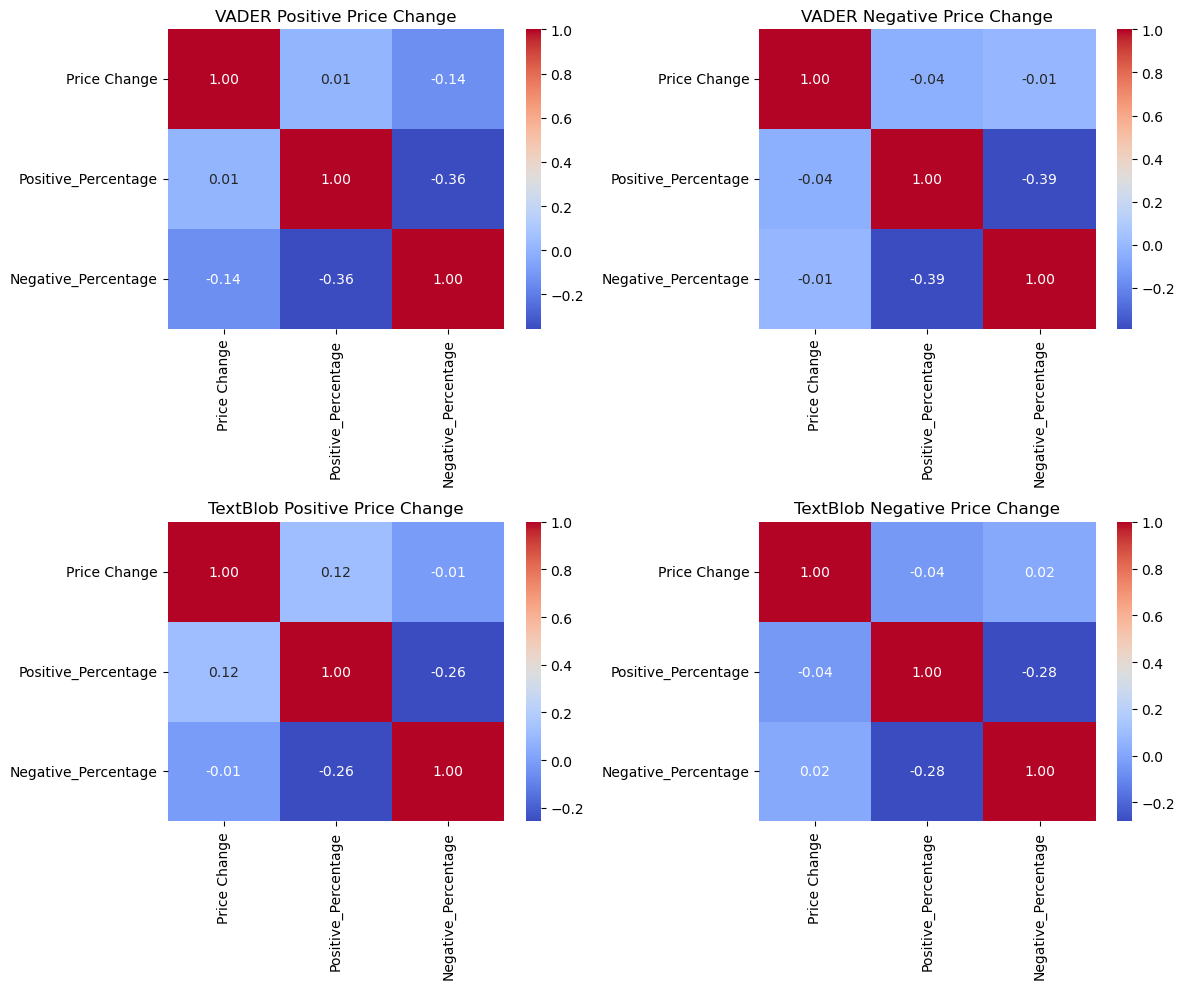

In [181]:
# Create a function to calculate the correlation matrix for a given sentiment type
def calculate_correlation_matrix(df, sentiment_type):
    if sentiment_type == 'positive':
        df_filtered = df[df['Price Change'] > 0][['Price Change', 'Positive_Percentage', 'Negative_Percentage']]
    elif sentiment_type == 'neutral':
        df_filtered = df[df['Price Change'] == 0][['Price Change', 'Neutral_Percentage']]
    elif sentiment_type == 'negative':
        df_filtered = df[df['Price Change'] < 0][['Price Change', 'Positive_Percentage', 'Negative_Percentage']]
    else:
        raise ValueError("Sentiment type must be 'positive', 'neutral', or 'negative'")
    
    correlation_matrix = df_filtered.corr()
    return correlation_matrix

# Plotting function for heatmap
def plot_heatmap(correlation_matrix, title, ax):
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(title)

# Calculate the correlation matrices for VADER
vader_positive_corr = calculate_correlation_matrix(vader_bit, 'positive')
vader_negative_corr = calculate_correlation_matrix(vader_bit, 'negative')

# Calculate the correlation matrices for TextBlob
textblob_positive_corr = calculate_correlation_matrix(textblob_bit, 'positive')
textblob_negative_corr = calculate_correlation_matrix(textblob_bit, 'negative')

# Plot the heatmaps side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_heatmap(vader_positive_corr, "VADER Positive Price Change", axes[0, 0])
plot_heatmap(vader_negative_corr, "VADER Negative Price Change", axes[0, 1])

plot_heatmap(textblob_positive_corr, "TextBlob Positive Price Change", axes[1, 0])
plot_heatmap(textblob_negative_corr, "TextBlob Negative Price Change", axes[1, 1])

plt.tight_layout()
plt.show()

# iii Distribution of Sentiment Scores

## Pie charts
A pie chart is a useful inital tool to get a quick understanding of the differences between Vader and TextBlob. The code below has plotted the sentiments (positive, neutral and negative) distributions for both Vader and TextBlob. The first take is that we can see that TextBlob has a significantly lower percentage of negative sentiment labels. TextBlob also has a much higher proption of neutral labels. This means Vader is more likely to score sentiment compared to TextBlob for same data/headline.

This can be due their distinct approaches to sentiment analysis. VADER is specifically attuned to sentiments expressed in social media and works well with short texts, while TextBlob uses a more general approach based on a pre-trained model. Their difference in their underlying mechanisms - VADER's rule-based approach versus TextBlob's machine learning model - can lead to varying interpretations of the same text, especially when dealing with context-dependent or ambiguous sentiment expressions.

From these pie charts we cannot tell which is more suitable for our project. TextBlob may be missing key sentiment words or rightfully categorising as neutral. These charts also cannot tell us the magnitude of sentiment e.g. Vader is scoring more headlines as negative however this might be a slightly negative score where as TextBlob might be scoring less headlines as negative but having a more negative score. 



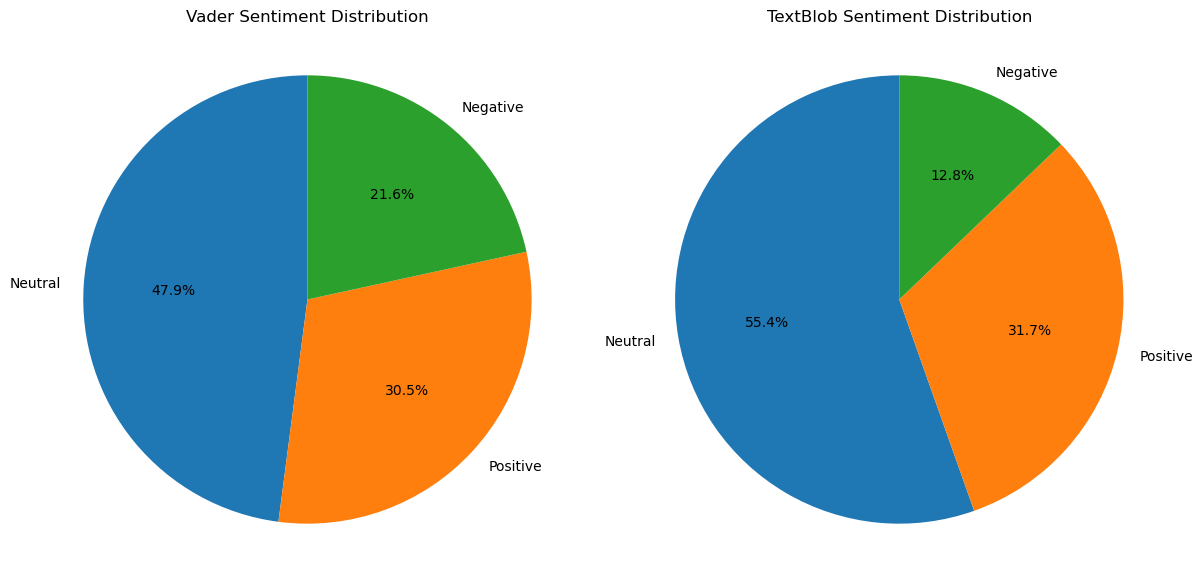

In [182]:
# Count the occurrences of each sentiment label
vader_sentiment_counts = vader['Sentiment_Label'].value_counts()

# Mapping the labels to sentiments
labels = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
vader_sentiment_counts.index = vader_sentiment_counts.index.map(labels)

# TextBlob Sentiment Analysis Pie Chart
# Count the occurrences of each sentiment label
textblob_sentiment_counts = textblob['Sentiment_Label'].value_counts()

# Mapping the labels to sentiments
textblob_sentiment_counts.index = textblob_sentiment_counts.index.map(labels)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plotting VADER pie chart
axs[0].pie(vader_sentiment_counts, labels=vader_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Vader Sentiment Distribution')

# Plotting TextBlob pie chart
axs[1].pie(textblob_sentiment_counts, labels=textblob_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('TextBlob Sentiment Distribution')

# Display the plots
plt.show()



## Histogram
Now we have an idea of the split in sentiment distribution from the pie charts we can now plot a histogram. This is a useful tool in understanding the magnitude of the different sentiment scores. The most obvious difference the 2 histograms is that bar -0.04 to 0 is much larger that in TextBlob. The neutral bar is larger in TextBlob, this could mean that TextBlob is classifying headlines as neutral where as Vader is classing them as very slightly negative. The second thing to note (quite tricky to see as the bars on teh end are so short) is that Vader has a larger range on both positive and negative side than TextBlob. 

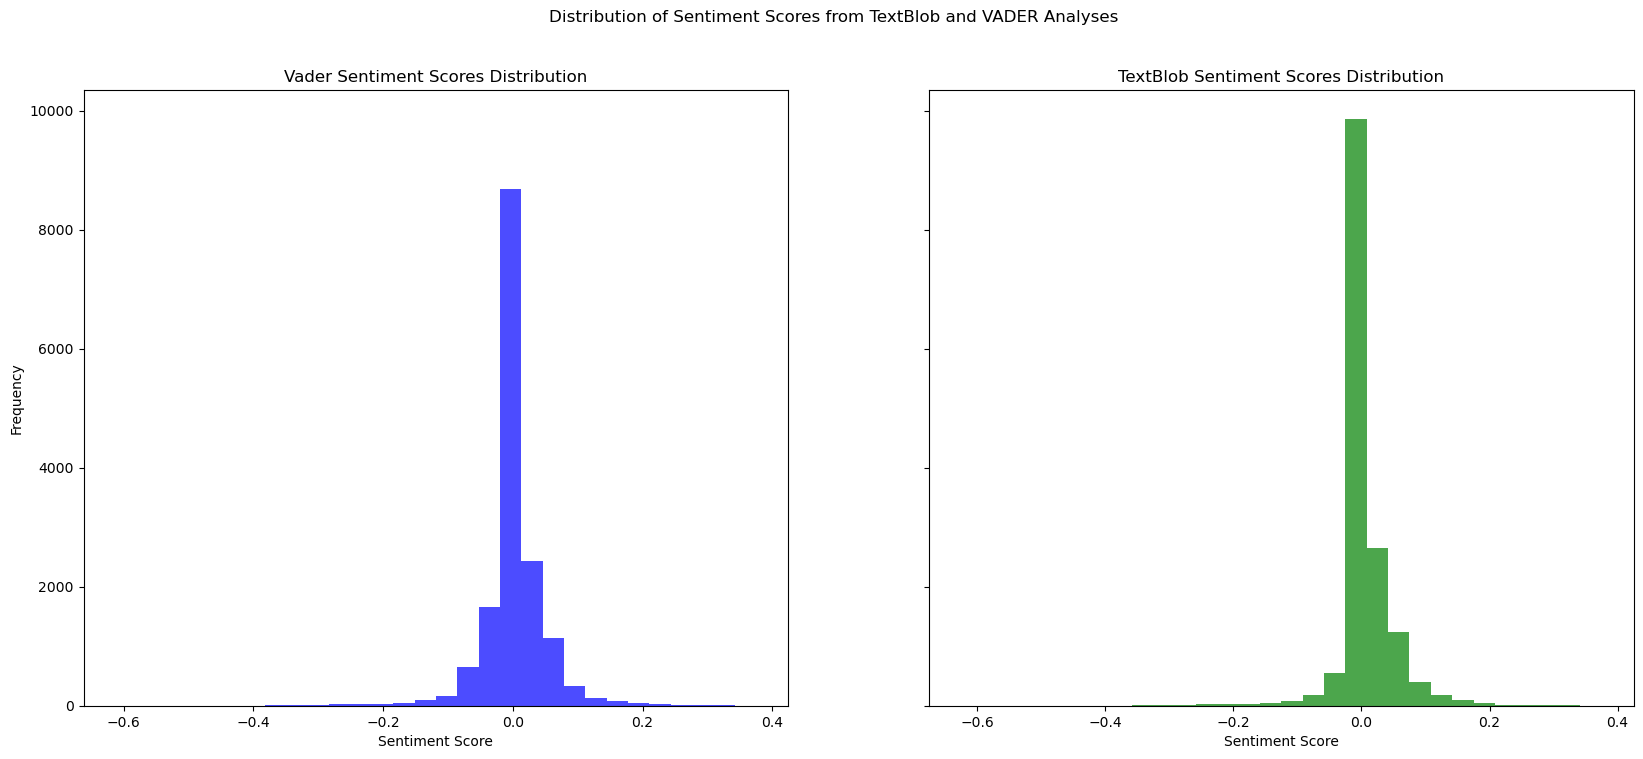

In [183]:
vader_scores = vader['Sentiment']  
textblob_scores = textblob['Sentiment']  

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plotting VADER sentiment scores histogram
axs[0].hist(vader_scores, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Vader Sentiment Scores Distribution')
axs[0].set_xlabel('Sentiment Score')
axs[0].set_ylabel('Frequency')

# Plotting TextBlob sentiment scores histogram
axs[1].hist(textblob_scores, bins=30, color='green', alpha=0.7)
axs[1].set_title('TextBlob Sentiment Scores Distribution')
axs[1].set_xlabel('Sentiment Score')

# Set overall title for the figure
fig.suptitle('Distribution of Sentiment Scores from TextBlob and VADER Analyses')

# Display the plots
plt.show()


# iv Visualisation of Lowest and Highest 10% Sentiment Words

### Remove crypto words from lem headline.
As we are looking at bitcoin headlines it is likely that the most common words are going to be bitcoin related. These words will likely come up in both positive and negative sentiment. I have decided to removed them as they do not give that much information on which words are causing the biggest impact to sentiment scores. I have decided to keep bull bearish etc in because despite being crypto related they indicate how crypto is performing. 

In [184]:
# Removing all crypto words as we have manually. This list was created in the data cleaning script to check relvance. 
words_to_remove = ['price', 'market', 'bitcoinistcom','crypto', 'btc', 'cold wallet', 'hashing power', 'whitelist', 'decentralised application', 
                   'asymmetric key algorithm', 'atl', 'private key', 'future', 'total supply', 
                   'wei', 'centralised', 'bitcoins', 'fully diluted', 'application specific integrated circuits', 
                   'bounty program', 'sharding', 'audit', 'locktime', 'hard fork', 'max supply', 
                   'digital commodity', 'commit', 'dao – decentralised autonomous organisations', 'gwei', 'nft', 
                   'maximum supply', 'ring signature', 'genesis block', 'application specific integrated circuit', 
                   'airdrop', 'limit order', 'bech32', 'token', 'gas limit', 'collateral', 
                   'tokenless ledger', 'yield farming', 'dyor', 'cypherpunk', 'ether', 'cryptocurrency', 'ico', 
                   'uxto', 'cryptographic hash function', 'whitepaper', 's2f', 'block explorer', 'digital identity', 
                   'block size', 'pob', 'ta', 'market capitalisation', 'burned', 'pow', 'masternode', 'halving', 
                   'transaction fee', 'blockchain', 'anonymous', 'alphanumeric', 'address', 'central ledger', 
                   'difficulty', 'ethereum classic', 'lightning network', 'ubtc', 'ethereum virtual machine', 'wallet', 
                   'etc', 'kyc', 'proof of work', 'proof of developer', 'test net', 'pod', 'unconfirmed', 
                   'emission rate', 'hodl', 'exchange', 'block height', 'multi signature wallets', 'leverage', 
                   '51% attack', 'dapp', 'flippening', 'mining', 'liquidity provider', 'dex', 'ethereum', 'apy', 
                   'web3', 'sha 256', 'roi', 'public key', 'bitcoin improvement proposal', 'jomo', 'millibitcoin', 
                   'all time high', 'api', 'abstract', 'poa', 'tps', 'portfolio', 'ath', 'satoshi nakamoto', 
                   'oracles', 'bfa', 'protocols', 'interoperability', 'peer to peer', 'dollar cost averaging', 
                   'pre sale', 'aes256', 'transaction id', 'gas price', 'gas', 'seed phrase', 'consortium blockchain', 
                   'market cap', 'erc 20', 'nonce', 'volatility', 'immutable', 'whale', 'block reward', 'fork', 
                   'eth', 'fud', 'liquidity mining', 'software wallet', 'smart contract', 
                   'brute force attack', 'eip', '2fa', 'distributed ledger', 'replay attack', 'cold storage', 
                   'full node', 'key pairs', 'dca', 'hash rate', 'segregated witness', 'satoshi', 'dark web', 
                   'staking', 'stock to flow model', 'arbitrage', 'fomo', 'miner', 'network', 
                   'stablecoin', 'proof of burn', 'hopium', 'pos', 'asic  miner', 'proof of authority', 'algorithm', 
                   'cbdc', 'soft fork', 'mining contract', 'etf', 'roadmap', 'metamask', 'mining pool', 'all time low', 
                   'atomic swap', 'bip', 'fiat', 'ledger', 'contract address', 'wholecoiner', 'circulating supply', 
                   'consensus', 'escrow', 'microbitcoin', 'segwit', 'permissioned blockchain', 'mbtc', 
                   'hardware wallet', 'node', 'bitcoin', 'qr code', 'altcoin', 'transaction', 'double spend', 
                   'confirmation', 'block', 'ticker', 'fa', 'cloud mining', 'liquidity', 'defi', 'proof of stake', 
                   '2 factor authentication', 'privacy coin', 'orphan', 'timestamp', 'â']

# Create a regex pattern to match the words/phrases
pattern = r'\b(?:' + '|'.join(re.escape(word) for word in words_to_remove) + r')\b'

# Remove the words/phrases from the 'Lem Headline' column
vader['Sentiment Headline'] = vader['Lem Headline'].str.replace(pattern, '', regex=True)
textblob['Sentiment Headline'] = textblob['Lem Headline'].str.replace(pattern, '', regex=True)

## Filtering data frame
This function returns a data frame for all the data between 2 given percentiles.

In [185]:
# Function which returns a dataframe of sentiment scores between 2 quantiles
def sentiment_range(qrt1, qrt2, data_frame, col_name):
    
    # Finds upper and lower threshold
    lower_threshold = data_frame[col_name].quantile(qrt1)
    upper_threshold = data_frame[col_name].quantile(qrt2)
    
    # Creates a data frame of the headlines that are inbetween the 2 theresholds
    sentiments = data_frame[(data_frame[col_name] >= lower_threshold) & (data_frame[col_name] <= upper_threshold)]
    return sentiments

## Word Cloud
This function draws a word cloud from the filtered data frame created above.

In [186]:
# Import word cloud make sure to uncomment line below if wordcloud is not installed onto your device!
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def cloud_quartiles(dataframe, headline_col): 
    
    #Join words in column together 
    cloud_text = ' '.join(dataframe[headline_col])
    
    #Create wordcloud
    cloud = WordCloud(background_color='white').generate(cloud_text)

    #plots cloud
    plt.imshow(cloud, interpolation='bilinear') 
    plt.axis("off")
    plt.show()

# Average sentiment for each word
Word clouds are good for visualising which words have the highest frequency, however they don't show which words are having the biggest impacts. In our dataframe we have the sentiment score for the entire headline but not for the individual words. This code aims to reverse engineer by adding the sentiment score of a headline to each word in that headline, this is then divided by the frequency of each word. I have filtered it so that the count is more than 2 - this is because I was finding words such as names of places of people were having a high positive or negative sentiment. We have taken headline data from multiple sources so there can be multiple headlines about the same story. Increasing the count threshold means that we can finding words with high cross overs into other stories. 

In [187]:
def avg_sent_score(headline_col, sentiment_score_col, dataframe, count_threshold):
    
    # Initialize counter for word_sentiment
    word_sentiment = Counter()
    word_count = Counter()

    # Iterate over each row in sentiment_range_df
    for index, row in dataframe.iterrows():
        # Using findall to extract words
        words = re.findall(r'\b\w+\b', row[headline_col])

        # Count occurrences of each word
        word_count.update(words)

        # Add the sentiment score of the headline to each word in the headline
        for word in words:
            word_sentiment[word] += row[sentiment_score_col]

    # Create a dataframe for the sentiment score of each word
    word_sentiment_df = pd.DataFrame(list(word_sentiment.items()), columns=['Word', 'Sentiment Score'])
    
    # Create a dataframe for the frequency of each word. 
    word_count_df = pd.DataFrame(list(word_count.items()), columns=['Word', 'Count'])
    word_count_df = word_count_df[word_count_df['Count'] >= count_threshold]

    # Join the 2 dataframes together on the same word
    word_sentiment_count_df = pd.merge(word_sentiment_df, word_count_df, on='Word')
    
    # Adds a column to find the avg sentiment score of each word
    word_sentiment_count_df['Avg Sentiment score'] = word_sentiment_count_df['Sentiment Score'] / word_sentiment_count_df['Count']
    
    return word_sentiment_count_df.sort_values('Avg Sentiment score', ascending=True), count_threshold
    

## Plot averages of sentiment
This has been a little bit tricky to achieve as the previous function has ordered in ascending order. This is good if you want the most positive sentiment words as you can take the top, however if you want to most negative you need the bottom values. To get around this I have taken an average and if this value is negative it takes the bottom values, it it si positive it takes the top values. 

In [188]:
def plot_extreme_scores(avg_sent_words_df, num_words, start_at_zero=False):
    df = avg_sent_words_df[0]  # Extract DataFrame from tuple
    count_threshold = avg_sent_words_df[1]  # Extract count threshold from tuple
    
    if df['Avg Sentiment score'].mean() > 0:
        top_words = df.head(num_words)  # Select top words for positive sentiment
    else:
        top_words = df.tail(num_words)  # Select bottom words for negative sentiment
    
    plt.figure(figsize=(14, 8))
    plt.bar(top_words['Word'], top_words['Avg Sentiment score'], color='blue')
    plt.title('Average sentiment of top {} sentiment words that appear at least {} times.'.format(num_words, count_threshold))
    
    if not start_at_zero:
        min_score = top_words['Avg Sentiment score'].min()
        max_score = top_words['Avg Sentiment score'].max()
        plt.ylim(bottom=min_score - (abs(min_score) * 0.1), top=max_score + (abs(max_score) * 0.1))  # Set lower and upper limits
    
    plt.xlabel('Words')
    plt.ylabel('Avg Sentiment score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Analysis:
## Lowest 10% sentiment
We can see that Text Blob is a little more specific to bitcoin e.g. bear, loss, plunge appear larger than in Vader, but this is only a slightly more specific. Both have successfully picked out some very negative words which shows that the sentiment scores have been successful. We can see that TextBlob has a higher sentiment score - this could be because higher scores are given for words or phrases or there are less neutral effects.  

Vader:


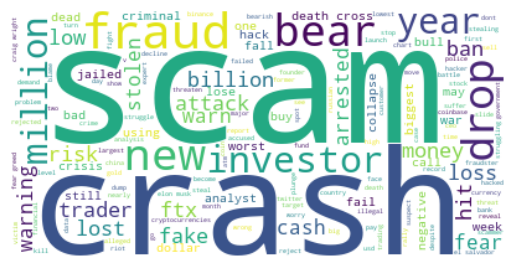

TextBlob:


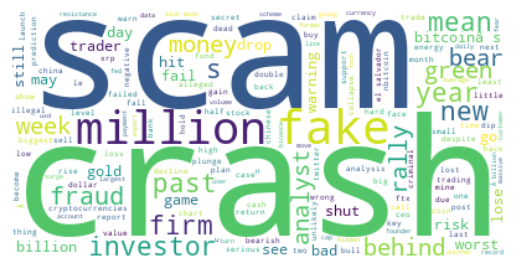

In [189]:
# Word clouds
print('Vader:')
V_Bottom_df = sentiment_range(0, 0.1, vader, 'Sentiment')
cloud_quartiles(V_Bottom_df, 'Sentiment Headline')

print('TextBlob:')
T_Bottom_df = sentiment_range(0, 0.1, textblob, 'Sentiment')
cloud_quartiles(T_Bottom_df, 'Sentiment Headline')

Vader:


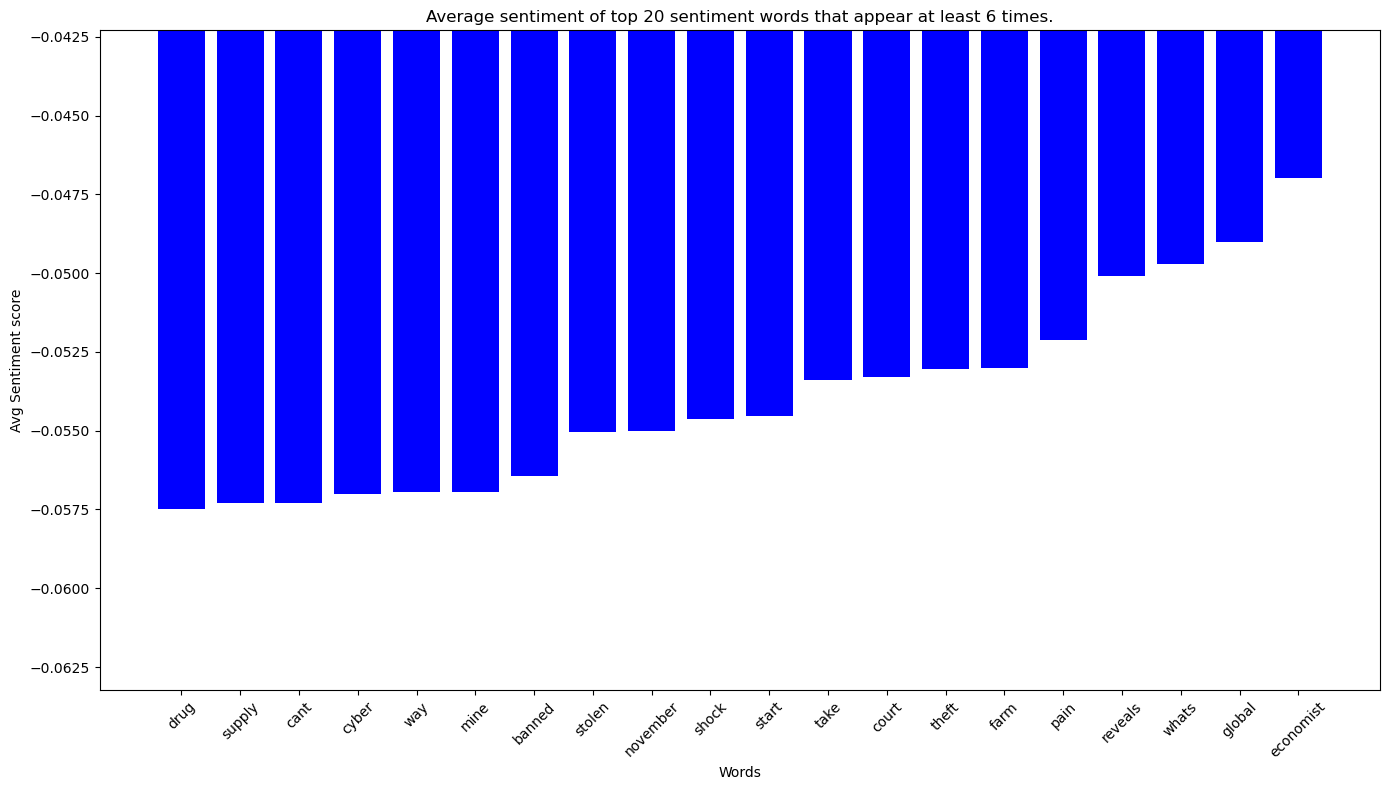

TextBlob:


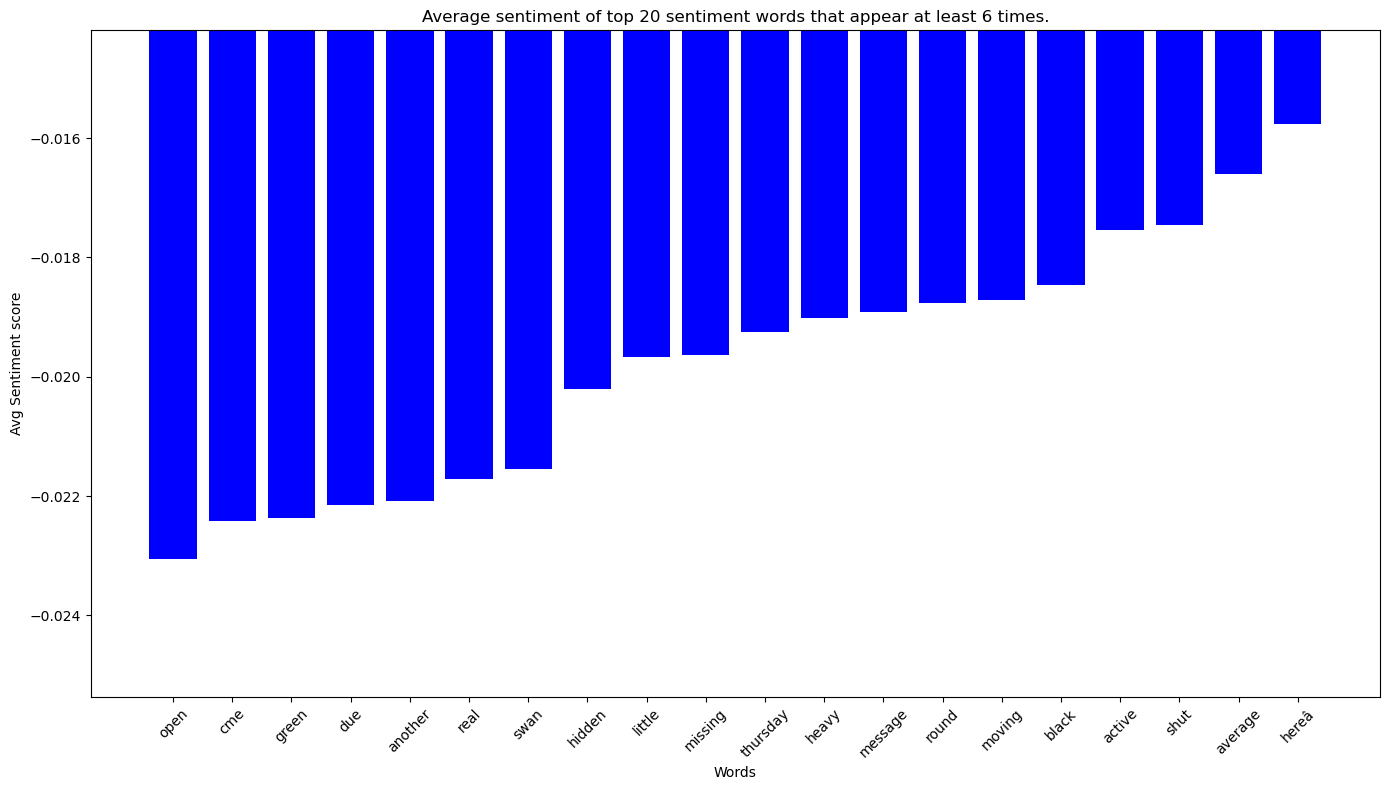

In [190]:
#Average sentiment words plotted

print('Vader:')
V_sentiment_range_df = sentiment_range(0, 0.1, vader, 'Sentiment')
V_avg_sent_words = avg_sent_score('Sentiment Headline', 'Sentiment', V_sentiment_range_df, 6)
plot_extreme_scores(V_avg_sent_words, 20, start_at_zero=False)

print('TextBlob:')
T_sentiment_range_df = sentiment_range(0, 0.1, textblob, 'Sentiment')
T_avg_sent_words = avg_sent_score('Sentiment Headline', 'Sentiment', T_sentiment_range_df, 6)
plot_extreme_scores(T_avg_sent_words, 20, start_at_zero=False)


## Highest 10% sentiment
When looking at the differences between Vader and TextBlob we can see both have accurately pick out positive words, however textblob is more specific to Bitcoin e.g. bullish, launch adoption, where as Vader is a bit more generic with top, new and best. 

Vader:


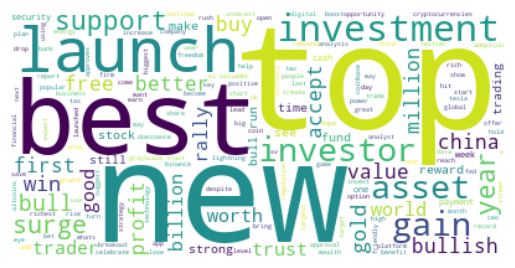

TextBlob:


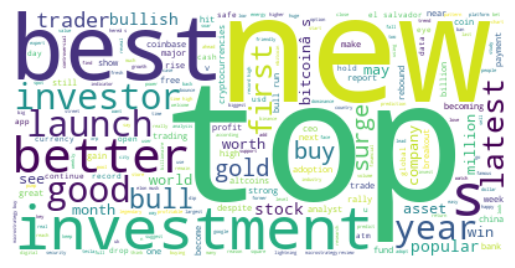

In [191]:
# Word clouds
print('Vader:')
V_Bottom_df = sentiment_range(0.9, 1, vader, 'Sentiment')
cloud_quartiles(V_Bottom_df, 'Sentiment Headline')

print('TextBlob:')
T_Bottom_df = sentiment_range(0.9, 1, textblob, 'Sentiment')
cloud_quartiles(T_Bottom_df, 'Sentiment Headline')

## Average sentiment per word
Vader attaches a significantly smaller amount of sentiment to each word than TextBlob. 

Vader:


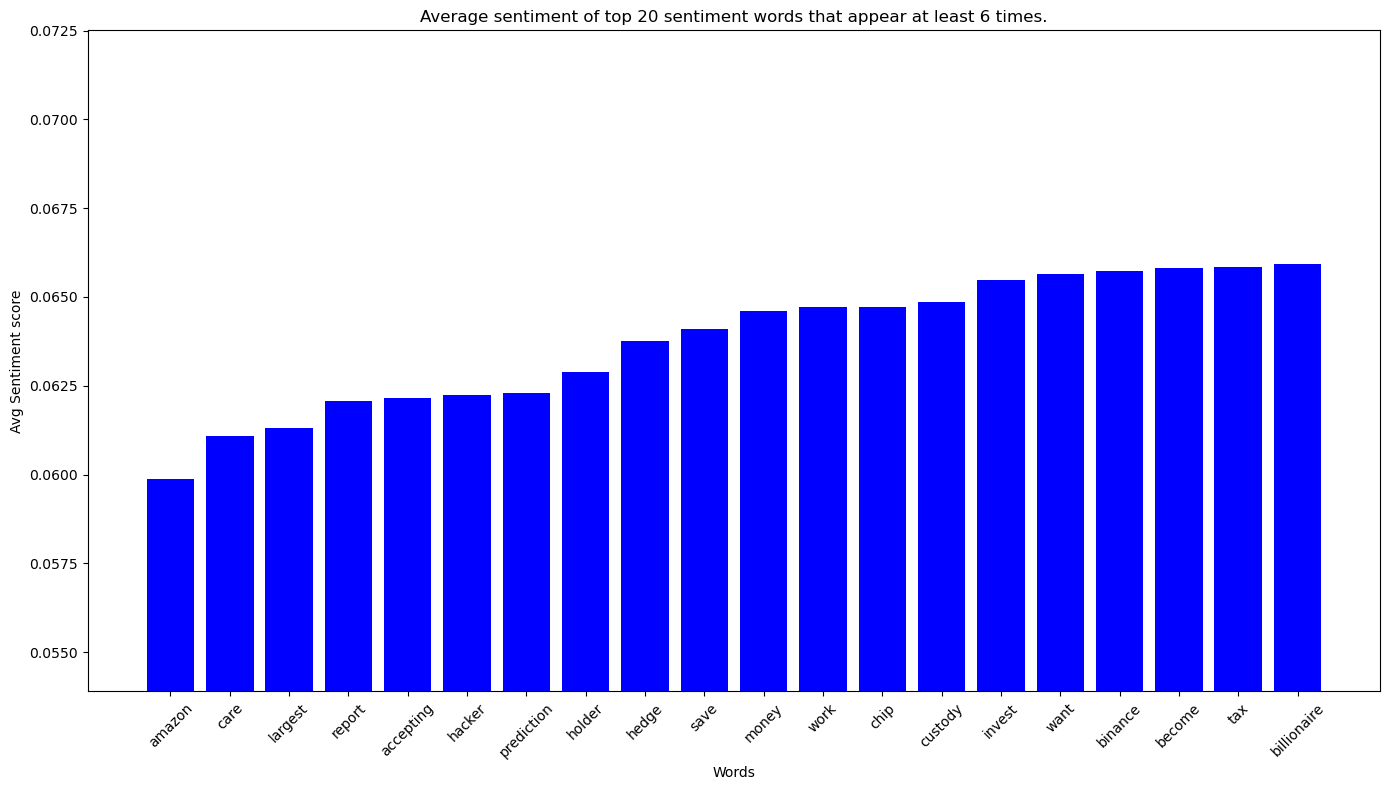

TextBlob:


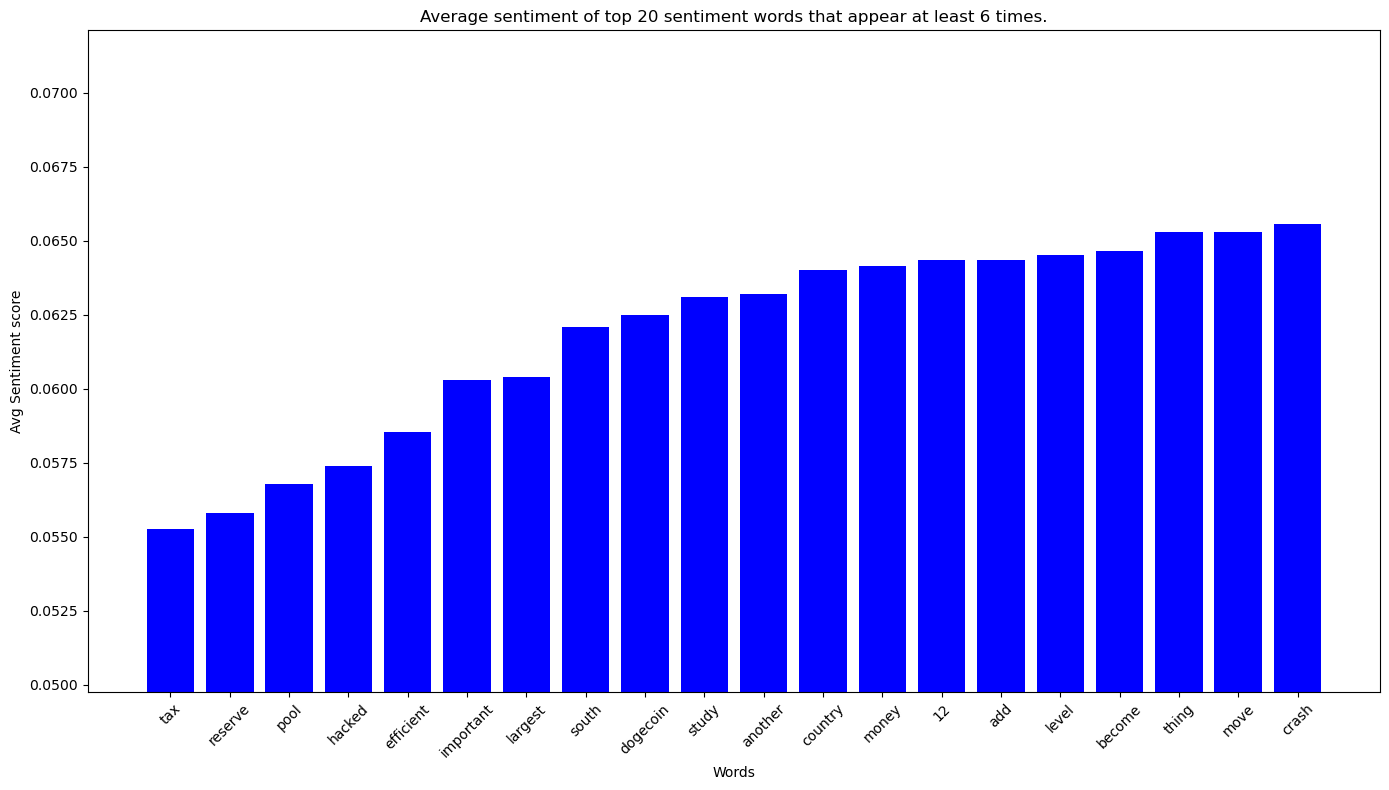

In [192]:
#Average sentiment words plotted

print('Vader:')
V_sentiment_range_df = sentiment_range(0.9, 1, vader, 'Sentiment')
V_avg_sent_words = avg_sent_score('Sentiment Headline', 'Sentiment', V_sentiment_range_df, 6)
plot_extreme_scores(V_avg_sent_words, 20)


print('TextBlob:')
T_sentiment_range_df = sentiment_range(0.9, 1, textblob, 'Sentiment')
T_avg_sent_words = avg_sent_score('Sentiment Headline', 'Sentiment', T_sentiment_range_df, 6)
plot_extreme_scores(T_avg_sent_words, 20)
